# ICCLIM C4I: Calculate the number of days with maximum temperature freezing or below

Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the number of days when the minimum temperature is freezing or below for the dataset chosen by the user on C4I. It uses the custom user index functionality of ICCLIM.

The data is read using xarray and a plot of the time series over a specific region is generated, as well as an average spatial map. Several output types examples are shown.

The dataset that is expected for this notebook are tasmin parameter for one specific climate model and experiment as well as one member. The time period should be continuous.

To keep this example fast to run, the following period is considered: 2015-01-01 to 2019-12-31, and plots are shown over European region.

## Choose the kernel env-gloenv-iccclim540
### Creation of the virtual env (already created)

module load python/gloenv3.9

python3 -m venv --system-site-packages /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540

source /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540/bin/activate

pip install --upgrade pip

pip install icclim

pip install nc_time_axis

pip install ipykernel

deactivate

### Add this environment to your jupyter kernel¶

source /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540/bin/activate

python3 -m ipykernel install --user --name env-gloenv-icclim540

close and reopen the notebook to see the new kernel env-gloenv-icclim540 and use it

### Delete the environment from your jupyter kernel¶
jupyter kernelspec list

jupyter kernelspec uninstall env-gloenv-icclim540

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.9.7 | packaged by conda-forge | (default, Sep 23 2021, 07:28:37) 
[GCC 9.4.0]
numpy:  1.21.2
xarray:  0.19.0
pandas:  1.3.3
icclim:  5.4.0
cftime:  1.5.1


/data/softs/anaconda3-2020.07/envs/gloenv_py3.9/lib/python3.9/site-packages/pyproj/__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


### Specification of the parameters and period of interest

In [2]:
# studied period
dt1 = datetime.datetime(2015,1,1)
dt2 = datetime.datetime(2019,12,31)

my_index_params = {'index_name': 'TXFZ',
                   'calc_operation': 'nb_events',
                   'logical_operation': 'let',
                   'thresh': 0 + 273.15 ### input data in Kelvin ==> threshold in Kelvin!
                  }

out_f = 'ndays_max_below_freezing_icclim.nc'
filenames = glob.glob('/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/data_icclim/latest/tasmax_day*.nc')

icclim.index(user_index=my_index_params, in_files=filenames, var_name='tasmax', slice_mode='year', time_range=[dt1, dt2], out_file=out_f, logs_verbosity='HIGH')


2022-08-10 17:37:08,150    ********************************************************************************************
2022-08-10 17:37:08,150    *                                                                                          *
2022-08-10 17:37:08,151    *          icclim                5.4.0   *
2022-08-10 17:37:08,151    *                                                                                          *
2022-08-10 17:37:08,151    *                                                                                          *
2022-08-10 17:37:08,152    *          Wed Aug 10 15:37:08 2022                                                    *
2022-08-10 17:37:08,152    *                                                                                          *
2022-08-10 17:37:08,152    *          BEGIN EXECUTION                                                                 *
2022-08-10 17:37:08,152    *                                                                  

<xarray.Dataset>
Dimensions:      (time: 5, lat: 256, lon: 512, bounds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02 ... 2019-07-02
  * lat          (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon          (lon) float64 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
    height       float64 2.0
  * bounds       (bounds) int64 0 1
Data variables:
    TXFZ         (time, lat, lon) int64 dask.array<chunksize=(1, 128, 256), meta=np.ndarray>
    time_bounds  (time, bounds) datetime64[ns] 2015-01-01 ... 2019-12-31

### Plot preparation

In [5]:
with xr.open_dataset(out_f, decode_times=False) as ds:
    nf_xr = ds
    ds['time'] = xr.decode_cf(ds).time

print(nf_xr)

# Select a single x,y combination from the data
longitude = nf_xr["TXFZ"]["lon"].sel(lon=3.5, method='nearest')
latitude = nf_xr["TXFZ"]["lat"].sel(lat=44.2, method='nearest')

print("Long, Lat values:", longitude, latitude)

<xarray.Dataset>
Dimensions:      (time: 5, lat: 256, lon: 512, bounds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02 ... 2019-07-02
  * lat          (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon          (lon) float64 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
    height       float64 ...
  * bounds       (bounds) int64 0 1
Data variables:
    TXFZ         (time, lat, lon) int64 ...
    time_bounds  (time, bounds) int64 ...
Long, Lat values: <xarray.DataArray 'lon' ()>
array(3.515625)
Coordinates:
    lon      float64 3.516
    height   float64 ...
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude <xarray.DataArray 'lat' ()>
array(43.85954452)
Coordinates:
    lat      float64 43.86
    height   float64 ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
  

### Subset and Plot

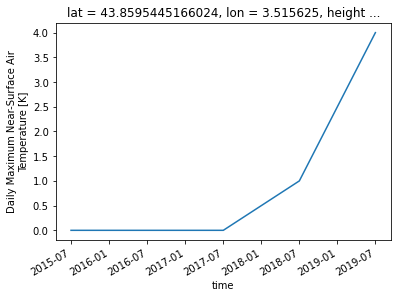

In [6]:
# Slice the data spatially using a single lat/lon point
one_point = nf_xr["TXFZ"].sel(lat=latitude, lon=longitude)

# Use xarray to create a quick time series plot
one_point.plot.line()
plt.show()

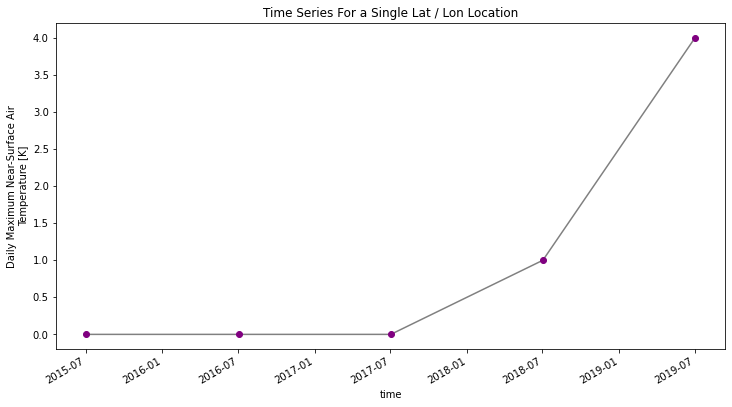

In [7]:
# You can clean up your plot as you wish using standard matplotlib approaches
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(hue='lat',
                    marker="o",
                    ax=ax,
                    color="grey",
                    markerfacecolor="purple",
                    markeredgecolor="purple")
ax.set(title="Time Series For a Single Lat / Lon Location")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

In [8]:
# Convert to dataframe -- then this can easily be exported to a csv
one_point_df = one_point.to_dataframe()
# View just the first 5 rows of the data
one_point_df.head()

# Export data to .csv file
#one_point_df.to_csv("one-location.csv")

lat       lon  height  TXFZ
time                                                  
2015-07-02 00:00:00  43.859545  3.515625     2.0     0
2016-07-01 12:00:00  43.859545  3.515625     2.0     0
2017-07-02 00:00:00  43.859545  3.515625     2.0     0
2018-07-02 00:00:00  43.859545  3.515625     2.0     1
2019-07-02 00:00:00  43.859545  3.515625     2.0     4

In [10]:
# Time subsetting: this is just an example on how to do it
start_date = "2018-01-01"
end_date = "2019-12-31"

nf = nf_xr["TXFZ"].sel(time=slice(start_date, end_date))

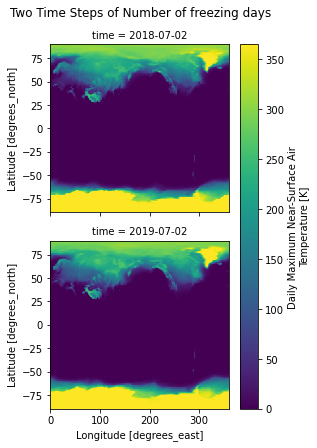

In [11]:
# Quickly plot the data using xarray.plot()
nf.plot(x="lon",
        y="lat",
        col='time',
        col_wrap=1)

plt.suptitle("Two Time Steps of Number of freezing days", y=1.03)
plt.show()

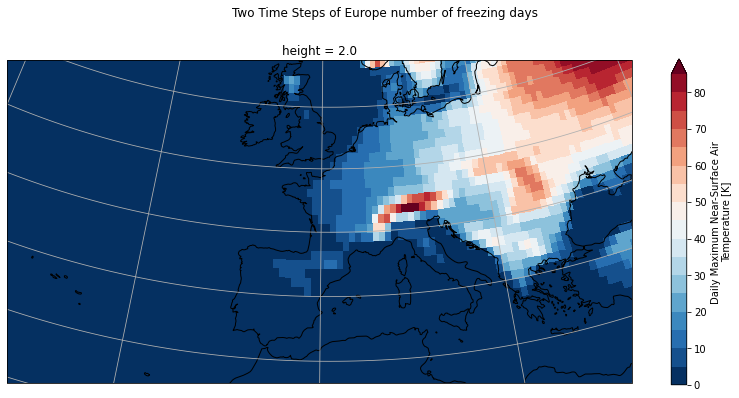

In [12]:
# Set spatial extent and centre
central_lat = 47.0
central_lon = 1.0
extent = [-30, 30, 30, 56]  # Western Europe

# Calculate time average
nf_avg = nf.mean(dim='time', keep_attrs=True)

# Set plot projection
map_proj = ccrs.AlbersEqualArea(central_longitude=central_lon,
                                central_latitude=central_lat)

# Define plot
f, ax = plt.subplots(figsize=(14, 6),
                     subplot_kw={'projection': map_proj})

# Plot data with proper colormap scale range
levels = np.arange(0, 90, 5)
p = nf_avg.plot(levels=levels,
                cmap='RdBu_r',
                transform=ccrs.PlateCarree())

# Plot information
plt.suptitle("Two Time Steps of Europe number of freezing days", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig('c4i_nf_icclim.png')

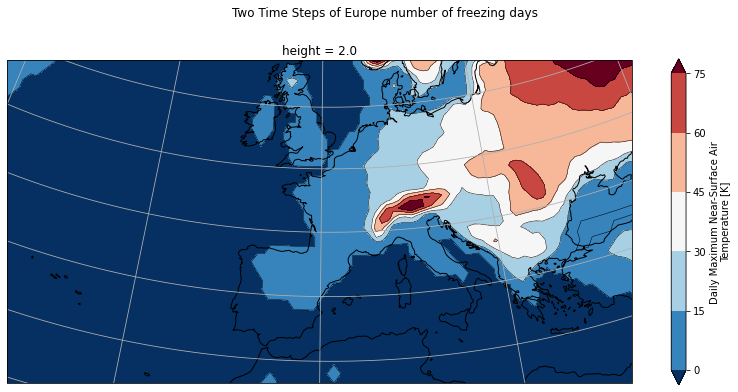

In [13]:
# Re-order longitude so that there is no blank line at 0 deg because 0 deg is within our spatial selection
nf_avg.coords['lon'] = (nf_avg.coords['lon'] + 180) % 360 - 180
nf_avg = nf_avg.sortby(nf_avg.lon)

# Define plot
f, ax = plt.subplots(figsize=(14, 6),
                     subplot_kw={'projection': map_proj})

# Define colorscale
levels = np.arange(0, 90, 15)

# Contours lines
p = nf_avg.plot.contour(levels=levels,
                         colors='k',
                         linewidths=0.5,
                         transform=ccrs.PlateCarree())

# Contour filled colors
p = nf_avg.plot.contourf(levels=levels,
                          cmap='RdBu_r',
                          extend='both',
                          transform=ccrs.PlateCarree())

# Plot information
plt.suptitle("Two Time Steps of Europe number of freezing days", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig('c4i_nf_contours_icclim.png')